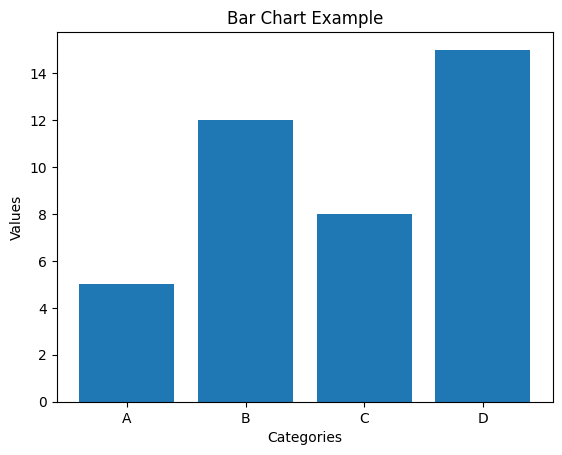

In [1]:
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C', 'D']
values = [5,12,8,15]

plt.bar (categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title("Bar Chart Example")
plt.show()

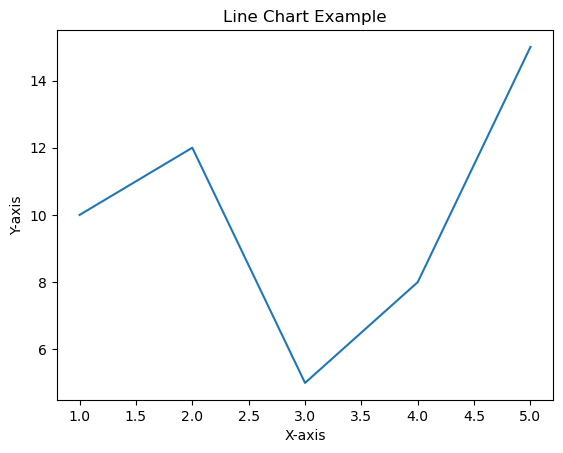

In [5]:
import matplotlib.pyplot as plt

x_values = [1,2,3,4,5]
y_values = [10,12,5,8,15]

plt.plot (x_values, y_values)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("Line Chart Example")
plt.show()

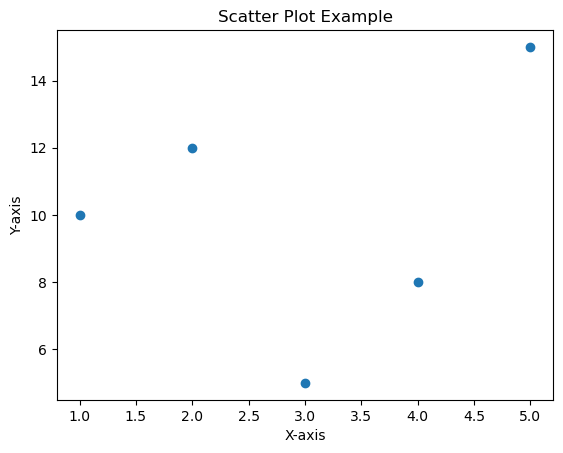

In [6]:
import matplotlib.pyplot as plt

x_values = [1,2,3,4,5]
y_values = [10,12,5,8,15]

plt.scatter (x_values, y_values)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("Scatter Plot Example")
plt.show()

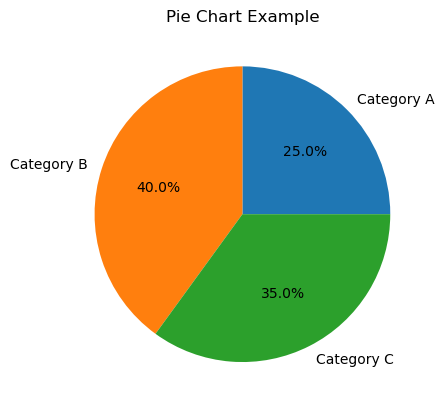

In [7]:
import matplotlib.pyplot as plt

labels = ['Category A','Category B','Category C']
sizes = [25,40,35]

plt.pie (sizes, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart Example")
plt.show()

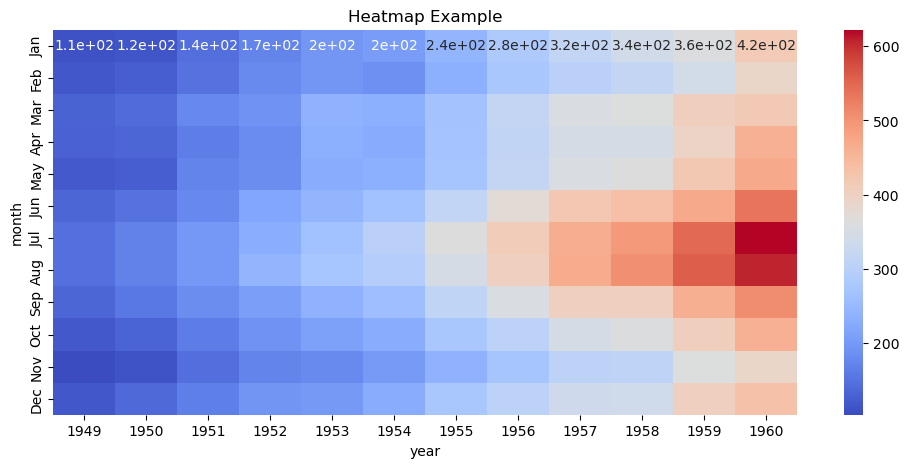

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('flights').pivot_table(index='month', columns='year', values='passengers')

plt.figure(figsize=(12,5))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title("Heatmap Example")
plt.show()

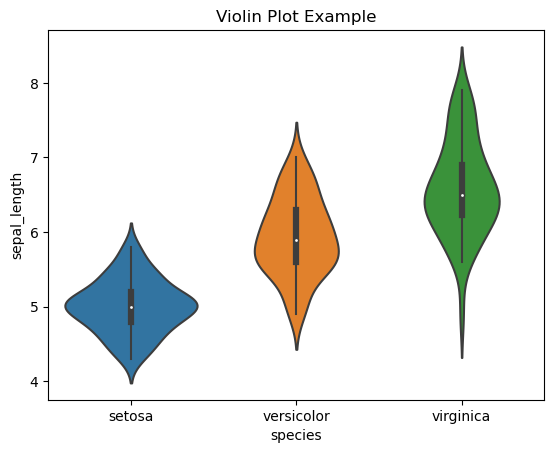

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('iris')

sns.violinplot(data, x='species', y='sepal_length')
plt.title("Violin Plot Example")
plt.show()

In [9]:
import pandas as pd

df1= pd.DataFrame({'ID':[1,2,3], 'Name':['Alice','Bob','Charlie']})
df2= pd.DataFrame({'ID':[1,2,4], 'Age':[25,30,22]})

merge_df = pd.merge(df1,df2, how='inner')
merge_df

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30


In [10]:
import pandas as pd

df1= pd.DataFrame({'ID':[1,2,3], 'Name':['Alice','Bob','Charlie']})
df2= pd.DataFrame({'ID':[4,5,6], 'Name':['David','Eva','Frank']})

concatenated_df = pd.concat([df1,df2], axis=0)
concatenated_df

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
0,4,David
1,5,Eva
2,6,Frank


In [13]:
import pandas as pd

df1= pd.DataFrame({'ID':[1,2,3], 'Name':['Alice','Bob','Charlie']})
df2= pd.DataFrame({'Age':[25,30,22]}, index=[1,2,4])

joined_df = df1.join(df2, on='ID', how='left')
joined_df

,ID,Name,Age
0,1,Alice,25.0
1,2,Bob,30.0
2,3,Charlie,NaN


In [3]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///:memory:')
df1 = pd.DataFrame({'ID':[1,2,3], 'Name':['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID':[1,2,4], 'Age':[25,30,22]})

df1.to_sql('table1' , engine)
df2.to_sql('table2' , engine)

query = 'SELECT * FROM table1 INNER JOIN table2 ON table1.ID=table2.ID'

result_df = pd.read_sql(query,engine)
result_df


,index,ID,Name,index,ID,Age
0,0,1,Alice,0,1,25
1,1,2,Bob,1,2,30


In [4]:
import dask.dataframe as dd
import pandas as pd

df1 = dd.from_pandas(pd.DataFrame({'ID':[1,2,3], 'Name':['Alice', 'Bob', 'Charlie']}), npartitions=2)
df2 = dd.from_pandas(pd.DataFrame({'ID':[1,2,4], 'Age':[25,30,22]}), npartitions=2)

merged_df = dd.merge(df1, df2, on='ID', how='inner')
merged_df



,ID,Name,Age
npartitions=2,,,
,int64,string,int64
,...,...,...
,...,...,...


In [8]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('tips')

#mengidentifikasi nilai hilang
missing_values = data.isnull().sum()
print("Jumlah data hilang: ")
print(missing_values)

Jumlah data hilang: 
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [33]:
import pandas as pd
import seaborn as sns

# Menggunakan dataset tips dari Seaborn sebagai contoh
data = sns.load_dataset('tips')

# Mengganti nilai yang hilang dalam kolom kategori dengan nilai yang paling sering muncul
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

# Menampilkan 5 baris pertama dari DataFrame untuk memastikan perubahan
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [19]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('tips')

#penanganan duplikasi data
data.drop_duplicates(inplace=True)

<Axes: ylabel='total_bill'>

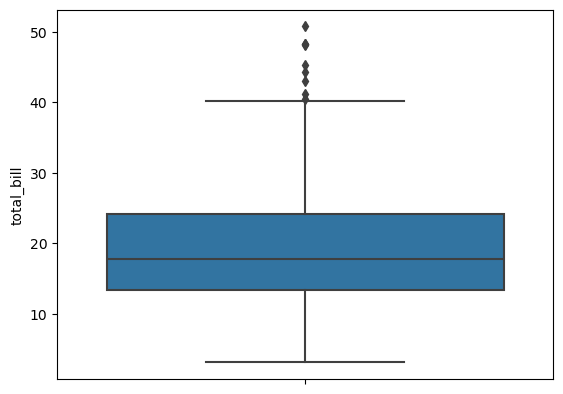

In [22]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('tips')

#mengidentifikasi outliers dengan boxplot
sns.boxplot(data, y='total_bill')


In [24]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('tips')

#menghapus outliers dengan z score
data['total_bill_Z'] = (data['total_bill']-data['total_bill'].mean())/data['total_bill'].std()
data.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_Z
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


In [28]:
import pandas as pnd
import seaborn as sns

data = sns.load_dataset('tips')

#menghitung mean dalam kolom total_bill
mean_total_bill = data['total_bill'].mean()
std_total_bill = data['total_bill'].std()

#menghitung batas atas dan bawah
upper_limit = mean_total_bill + 2 * std_total_bill
lower_limit = mean_total_bill - 2 * std_total_bill

#memfilter data frame
data_no_outliers = data[(data['total_bill'] < upper_limit) & (data['total_bill'] > lower_limit)]

#menampilkan data frame baru
data_no_outliers.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: ylabel='total_bill'>

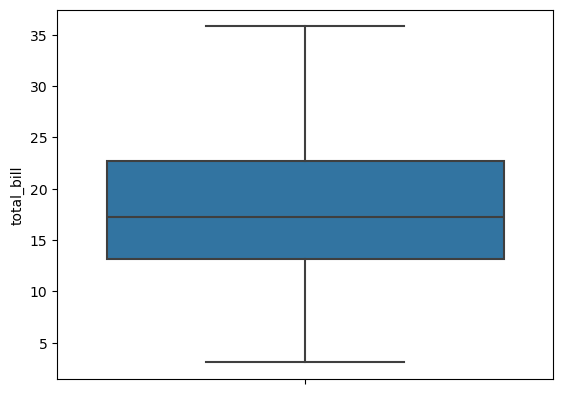

In [32]:
import pandas as pnd
import seaborn as sns

data = sns.load_dataset('tips')

#menghitung mean dalam kolom total_bill
mean_total_bill = data['total_bill'].mean()
std_total_bill = data['total_bill'].std()

#menentukan batas atas dan bawah
upper_limit = mean_total_bill + 2 * std_total_bill
lower_limit = mean_total_bill - 2 * std_total_bill

#memfilter data frame
data_no_outliers = data[(data['total_bill'] < upper_limit) & (data['total_bill'] > lower_limit)]

#membuat botplox
sns.boxplot(data=data_no_outliers, y='total_bill')


In [34]:
import pandas as pnd
import seaborn as sns

data = sns.load_dataset('tips')

#menangani kesalahan tipe
data['sex']=pd.to_numeric(data['sex'], errors='coerce')
data.dtypes

total_bill     float64
tip            float64
sex            float64
smoker        category
day           category
time          category
size             int64
dtype: object

In [36]:
import pandas as pnd
import seaborn as sns

data = sns.load_dataset('tips')

#penanganan anomali data
df = data[data['total_bill']>10.00]
df['total_bill'].min()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
import pandas as pnd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = sns.load_dataset('iris')

#Normalisasi
scaler = MinMaxScaler()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
import pandas as pnd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = sns.load_dataset('iris')

#Normalisasi
scaler = MinMaxScaler()

data.drop('species', axis=1, inplace=True)
data_sc = scaler.fit_transform(data)
data = pd.DataFrame(data_sc, columns=data.columns)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = sns.load_dataset('iris')
#validasi konsistensi
assert data['sepal_length'].between(0,100).all(), "Kesalahan: Nilai di luar rentang yang diizinkan"


#Normalisasi
scaler = MinMaxScaler()

data.drop('species', axis=1, inplace=True)
data_sc = scaler.fit_transform(data)
data = pd.DataFrame(data_sc, columns=data.columns)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [42]:
pip install sastrawi

   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
   ----- --------------------------------- 30.7/209.7 kB 217.9 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/209.7 kB 217.9 kB/s eta 0:00:01
   ----------- --------------------------- 61.4/209.7 kB 328.2 kB/s eta 0:00:01
   ------------------------------- ------ 174.1/209.7 kB 748.1 kB/s eta 0:00:01
   -------------------------------------- 209.7/209.7 kB 852.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import re

df = pd.read_excel("C:\\Data\\lagu.xlsx")
df.tail()

,kau dan aku akan slalu menyatu
0,(dan yakinkan hati kita berdua)
1,semua kisah terlukis indah
2,kau dan aku akan slalu menyatu
3,dan yakinkan hati kita berdua


In [8]:
import pandas as pd
import re

df = pd.read_excel("C:\\Data\\lagu.xlsx")
df.isnull().sum()

kau dan aku akan slalu menyatu    0
dtype: int64

In [10]:
import pandas as pd
import re

df = pd.read_excel("C:\\Data\\lagu.xlsx")
df.dropna(how='any' , inplace=True)

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

#mengimport data
data = sns.load_dataset('iris')

#memilih fitur yang diubah
features = ['sepal_length' , 'sepal_width']

#menggunakan standardscaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,1.4,0.2,setosa
1,-1.143017,-0.131979,1.4,0.2,setosa
2,-1.385353,0.328414,1.3,0.2,setosa
3,-1.506521,0.098217,1.5,0.2,setosa
4,-1.021849,1.249201,1.4,0.2,setosa


In [14]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import seaborn as sns

data = sns.load_dataset('iris')

features = ['petal_length']

data[features] = np.log1p(data[features])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.875469,0.2,setosa
1,4.9,3.0,0.875469,0.2,setosa
2,4.7,3.2,0.832909,0.2,setosa
3,4.6,3.1,0.916291,0.2,setosa
4,5.0,3.6,0.875469,0.2,setosa


In [19]:
import numpy as np
import seaborn as sns
import pandas as pd

data = sns.load_dataset('iris')

feature = 'sepal_length'

data[feature] = pd.cut(data[feature], bins=3, labels=['Low','Medium','High'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,Low,3.5,1.4,0.2,setosa
1,Low,3.0,1.4,0.2,setosa
2,Low,3.2,1.3,0.2,setosa
3,Low,3.1,1.5,0.2,setosa
4,Low,3.6,1.4,0.2,setosa


In [25]:
import pandas as pd 
import seaborn as sns 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

data = sns.load_dataset('iris')

features = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'] 
x = data[features] 
x_standardized = StandardScaler().fit_transform(x)

pca = PCA(n_components=2) 
principal_components=pca.fit_transform(x_standardized) 
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2']) 
principal_df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [26]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data = sns.load_dataset('iris')

features = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'] 
x = data[features] 
x_standardized = StandardScaler().fit_transform(x)

tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(x_standardized)
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df.head()

,t-SNE1,t-SNE2
0,-26.283514,-0.934040
1,-22.458551,-1.582246
2,-23.502516,-0.568364
3,-22.724354,-0.502646
4,-26.786913,-0.364475


In [27]:
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

data = sns.load_dataset('iris')

features = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'] 
x = data[features] 
x_standardized = StandardScaler().fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(x_standardized, data['species'])
lda_df = pd.DataFrame(lda_result, columns=['LDA1', 'LDA2'])
lda_df

,LDA1,LDA2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463
...,...,...
145,-5.645003,1.677717
146,-5.179565,-0.363475
147,-4.967741,0.821141
148,-5.886145,2.345091
